## 1. Data Collection

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import xlrd
import matplotlib.dates as mdates

In [2]:
# Importing data
df_groc_1 = pd.read_fwf('../data/saltsnck_groc_1687_1739')
df_groc_2 = pd.read_fwf('../data/saltsnck_groc_1635_1686')

### Groceries Dataframe

In [3]:
df_groc_1.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [4]:
# Checking length of dataset
len_groc_1 = len(df_groc_1.index)
print(len_groc_1)

20777520


In [5]:
df_groc_2.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1635,0,3,78271,2060,6,12.00,NONE,0,1
1,234212,1635,0,3,78271,2061,4,8.79,NONE,0,1
2,234212,1635,0,1,84114,11336,5,15.00,NONE,0,0
3,234212,1635,0,1,84114,11391,4,12.00,NONE,0,0
4,234212,1635,0,1,84114,10990,8,21.96,NONE,0,1


In [6]:
# Checking length of dataset
len_groc_2 = len(df_groc_2.index)
print(len_groc_2)

19636683


In [7]:
df_groc = pd.concat([df_groc_1, df_groc_2], ignore_index=True)

In [8]:
df_groc.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0


In [9]:
# Checking new length of dataset
len_df_groc = len(df_groc.index)
if len_df_groc == (len_groc_1 + len_groc_2):
    print(f"Correctly concatinated: {len_df_groc}")
else:
    print("Please check dataframes")

Correctly concatinated: 40414203


### Attributes and Delivery Dataframe

In [107]:
# Importing data
df_attr = pd.read_fwf('../data/saltsnck_prod_attr')
df_stores = pd.read_fwf('../data/Delivery_Stores')

In [108]:
df_attr.head()

,SY,GE,VEND,ITEM,VOL_EQ,FLAVOR/SCENT,PACKAGE,PRODUCT TYPE,STORE,LOCATION,...,NUT.1,TYPE OF.14,POPCORN,TYPE OF.15,PREPARATION,TYPE OF.16,TOPPING,TYPE OF TORTILLA,TYPE OF.17,TORTILLA/KIT
0,0,1,2,72107,0.7500,KETTLE CORN,PLASTIC BAG,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
1,0,1,2,80294,1.0000,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
2,0,1,2,80296,0.8500,SESAME,PLASTIC BAG,PRETZEL,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
3,0,1,2,83302,0.4844,MISSING,BAG,SNACK MIX,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN
4,0,1,9,7436,1.1250,ASSORTED,TIN,RTE POPCORN,SHELF,STABLE,...,NaN,MISSING,NaN,MISSING,NaN,MISSING,NaN,MISSING,MISSING,NaN


In [109]:
df_attr.dtypes

SY                    int64
GE                    int64
VEND                  int64
ITEM                  int64
VOL_EQ              float64
                     ...   
TYPE OF.16           object
TOPPING              object
TYPE OF TORTILLA     object
TYPE OF.17           object
TORTILLA/KIT        float64
Length: 131, dtype: object

In [110]:
df_stores.head()

,IRI_KEY,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,200032,GR,25.28099,NEW YORK,1539,1743,Chain5
1,200156,GR,16.52399,DETROIT,1689,1799,Chain44
2,200272,GR,11.09200,LOS ANGELES,873,9998,Chain107
3,200341,GR,25.69398,SAN DIEGO,1197,9998,Chain107
4,200379,GR,29.52299,SOUTH CAROLINA,1348,1719,Chain55


### Products and Week Dataframe

In [111]:
# Importing data
df_prod = pd.read_excel('../data/prod_saltsnck.xls')
df_week = pd.read_excel('../data/IRI week translation_2008_2017.xls')

In [112]:
df_prod.head()

,L1,L2,L3,L4,L5,L9,Level,UPC,SY,GE,...,ITEM,*STUBSPEC 1431RC 00004,VOL_EQ,PRODUCT TYPE,PACKAGE,FLAVOR/SCENT,FAT CONTENT,COOKING METHOD,SALT/SODIUM CONTENT,TYPE OF CUT
0,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN BBQ PTCHP THN 6OZ,9,00-02-36300-04650,0,2,...,4650,+GORDN BBQ PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,BARBECUE,MISSING,MISSING,MISSING,THIN
1,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN ORGL PTCHP FLAT 14.5OZ,9,00-01-36300-04632,0,1,...,4632,+GORDN ORGL PTCHP FLAT 14.5OZ 0 1 3...,0.9063,POTATO CHIP,PLASTIC BAG,ORIGINAL,MISSING,MISSING,MISSING,FLAT
2,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REDHT PTCHP RPLD 6OZ,9,00-02-36300-04652,0,2,...,4652,+GORDN REDHT PTCHP RPLD 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,RED HOT,MISSING,MISSING,MISSING,RIPPLED
3,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP RPLD 6OZ,9,00-03-36300-04641,0,3,...,4641,+GORDN REG PTCHP RPLD 6OZ 0 3 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,RIPPLED
4,CATEGORY - SALTY SNACKS,POTATO CHIPS,ACTON CO INC,ACTON CO INC,GORDONS,+GORDN REG PTCHP THN 6OZ,9,00-02-36300-04640,0,2,...,4640,+GORDN REG PTCHP THN 6OZ 0 2 3...,0.3750,POTATO CHIP,BAG,REGULAR,MISSING,MISSING,MISSING,THIN


In [113]:
df_prod.dtypes

L1                                                                                   object
L2                                                                                   object
L3                                                                                   object
L4                                                                                   object
L5                                                                                   object
L9                                                                                   object
Level                                                                                 int64
UPC                                                                                  object
SY                                                                                    int64
GE                                                                                    int64
VEND                                                                            

In [114]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on,Unnamed: 3,Calendar date,IRI Week.1
0,1479,2007-12-31,2008-01-06,NaN,1979-09-03,1.0
1,1480,2008-01-07,2008-01-13,NaN,NaT,NaN
2,1481,2008-01-14,2008-01-20,NaN,NaT,NaN
3,1482,2008-01-21,2008-01-27,NaN,NaT,NaN
4,1483,2008-01-28,2008-02-03,NaN,NaT,NaN


In [115]:
df_week = df_week.drop(columns=["Calendar date","IRI Week.1","Unnamed: 3"], axis=1)

In [116]:
df_week.head()

,IRI Week,Calendar week starting on,Calendar week ending on
0,1479,2007-12-31,2008-01-06
1,1480,2008-01-07,2008-01-13
2,1481,2008-01-14,2008-01-20
3,1482,2008-01-21,2008-01-27
4,1483,2008-01-28,2008-02-03


## 2. Data Preparation

### Merging Stores and Groceries Dataframe

In [117]:
# Checking length of dataset
print(len_df_groc)

40414203


In [118]:
df = df_groc.merge(df_stores, on='IRI_KEY')

In [119]:
# Checking new length of dataset
len_df_s1_before = len(df_groc.index)
len_df_s1_after = len(df.index)
if len_df_s1_before == len_df_s1_after:
    print(f"Correctly concatinated: {len_df_s1_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s1_before - len_df_s1_after)/len_df_s1_before)*100):.5f}%")

Please check dataframes. Unmatched rows (%): 0.46335%


In [120]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435,9998,Chain42
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42


In [121]:
df = df.merge(df_week.rename(columns={'IRI Week': 'WEEK'}), on='WEEK')

In [122]:
# Checking new length of dataset
len_df_s2_after = len(df.index)
if len_df_s1_after == len_df_s2_after:
    print(f"Correctly concatinated: {len_df_s2_after}")
else:
    print(f"Please check dataframes. Unmatched rows (%): {(((len_df_s1_after - len_df_s2_after)/len_df_s1_after)*100):.5f}%")

Correctly concatinated: 40226945


In [123]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,OU,EST_ACV,Market_Name,Open,Clsd,MskdName,Calendar week starting on,Calendar week ending on
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,1,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,0,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01


In [124]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
dtype: object

### UPC Creation

In [125]:
# Create a new column that concatenates SY, GE, VEND, and ITEM to create the UPC
df['UPC'] = df['SY'].astype(str).str.zfill(2) + '-' + df['GE'].astype(str).str.zfill(2) + '-' + df['VEND'].astype(str).str.zfill(5) + '-' + df['ITEM'].astype(str).str.zfill(5)

In [126]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
UPC                                  object
dtype: object

In [127]:
df["UPC"].info

<bound method Series.info of 0           00-01-84114-11336
1           00-01-84114-11391
2           00-01-84114-10990
3           00-02-84114-10813
4           00-01-84114-00999
                  ...        
40226940    07-01-28229-01315
40226941    07-01-20495-39347
40226942    07-01-20495-39313
40226943    07-01-20495-39321
40226944    08-01-29515-30200
Name: UPC, Length: 40226945, dtype: object>

### Merging Main and Product Dataframe

In [128]:
# Searching VEND number for Pepsico INC
vend_unique_df = df_prod[['VEND', 'L3']].drop_duplicates()

In [129]:
duplicates = vend_unique_df.groupby('VEND')['L3'].value_counts()

# Check if there are any duplicates
duplicates = duplicates[duplicates > 1]

if len(duplicates) > 0:
    print(duplicates)
else:
    print("No duplicates found")

No duplicates found


In [130]:
df = df.merge(vend_unique_df, on='VEND', how="left")

In [131]:
df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,...,OU,EST_ACV,Market_Name,Open,Clsd,MskdName,Calendar week starting on,Calendar week ending on,UPC,L3
0,234212,1687,0,1,84114,11336,5,12.50,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-11336,KETTLE FOODS INC
1,234212,1687,0,1,84114,11391,5,12.50,NONE,0,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-11391,KETTLE FOODS INC
2,234212,1687,0,1,84114,10990,9,22.50,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-10990,KETTLE FOODS INC
3,234212,1687,0,2,84114,10813,5,12.75,NONE,1,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-02-84114-10813,KETTLE FOODS INC
4,234212,1687,0,1,84114,999,2,5.00,NONE,0,...,GR,34.04199,CHICAGO,435,9998,Chain42,2011-12-26,2012-01-01,00-01-84114-00999,KETTLE FOODS INC


In [132]:
df.dtypes

IRI_KEY                               int64
WEEK                                  int64
SY                                    int64
GE                                    int64
VEND                                  int64
ITEM                                  int64
UNITS                                 int64
DOLLARS                             float64
F                                    object
D                                     int64
PR                                    int64
OU                                   object
EST_ACV                             float64
Market_Name                          object
Open                                  int64
Clsd                                  int64
MskdName                             object
Calendar week starting on    datetime64[ns]
Calendar week ending on      datetime64[ns]
UPC                                  object
L3                                   object
dtype: object

In [133]:
# Make sure 'Calendar week starting on' and 'Calendar week ending on' are datetime objects
df['Calendar week starting on'] = pd.to_datetime(df['Calendar week starting on'])
df['Calendar week ending on'] = pd.to_datetime(df['Calendar week ending on'])

# Rename the column
df = df.rename(columns={'Calendar week starting on': 'CALENDAR_DATE'})

In [134]:
# Dropping column for VEND merger
df = df.drop(columns=["Open","Clsd","SY","GE","OU","VEND","ITEM","F", "Calendar week ending on"], axis=1)

In [135]:
# Filter for the New York area
ny_pepsico_df = df[(df['Market_Name'] == 'NEW YORK') & (df['L3'] == 'PEPSICO INC')].copy()

In [136]:
def rename_columns(df):
    df.columns = map(str.upper, df.columns)
    return df

In [137]:
ny_pepsico_df = rename_columns(ny_pepsico_df)

In [138]:
ny_pepsico_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
dtype: object

## 3. Data Cleaning

In [139]:
# Creating average price variable
ny_pepsico_df['AVG_PRICE'] = (ny_pepsico_df['DOLLARS'] / ny_pepsico_df['UNITS']).round(2)

In [140]:
ny_pepsico_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
AVG_PRICE               float64
dtype: object

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_32374/1170786397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ny_pepsico_correlation_matrix = ny_pepsico_df.corr()


<Axes: >

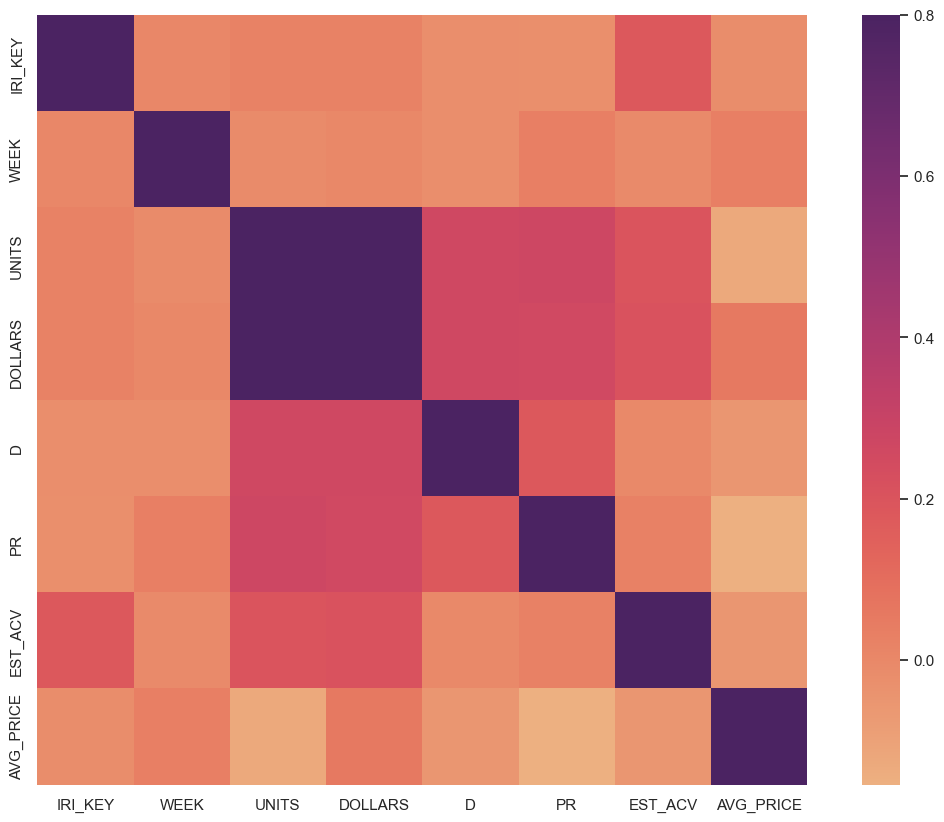

In [141]:
# Showing a correlation matrix heatmap of all variables
ny_pepsico_correlation_matrix = ny_pepsico_df.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(d_correlation_matrix, vmax=.8, square=True, cmap="flare")

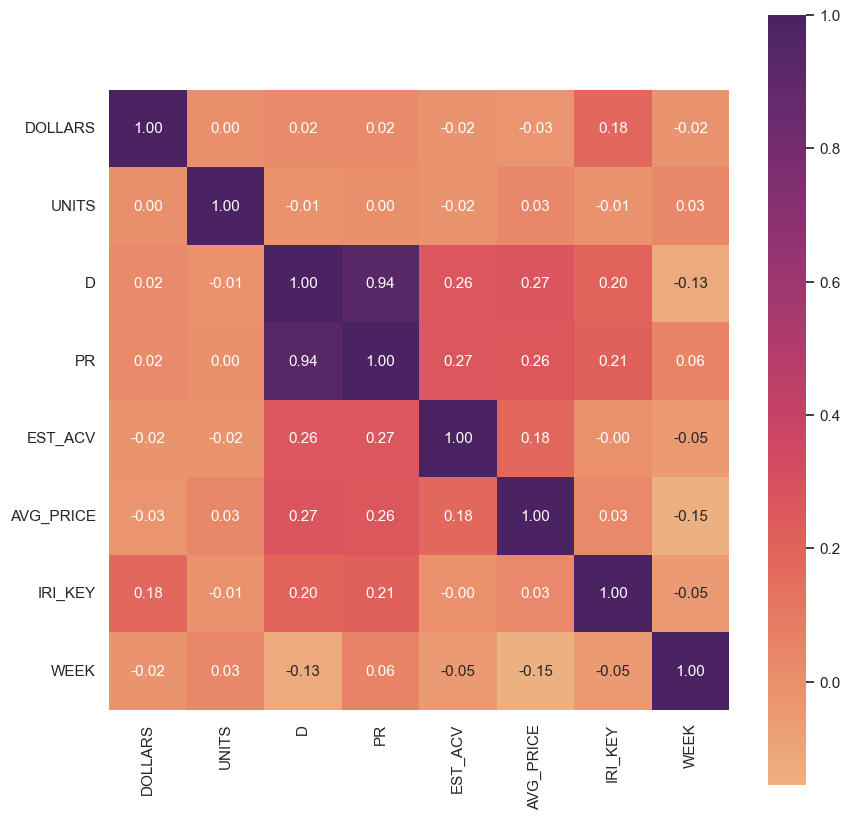

In [142]:
# Showing a correlation matrix heatmap of the eleven highest correlated variables with the outcome variable
columns = ny_pepsico_correlation_matrix.nlargest(11, 'DOLLARS')['DOLLARS'].index
ny_pepsico_top_correlation_matrix = np.corrcoef(ny_pepsico_df[columns].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(ny_pepsico_correlation_matrix, cbar=True, annot=True, square=True, cmap="flare", fmt='.2f', annot_kws={'size': 11}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [165]:
# Filter promotion to exclude promotons for model building
ny_pepsico_baseline_df = ny_pepsico_df[ny_pepsico_df['PR'] <= 0.1].copy()

In [167]:
ny_pepsico_baseline_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
AVG_PRICE               float64
dtype: object

In [169]:
# First, ensure your DataFrame is sorted by the 'Calendar Date' column
ny_pepsico_baseline_df.sort_values('CALENDAR_DATE', inplace=True)

ny_pepsico_baseline_df = ny_pepsico_baseline_df.sort_values(by=['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY', 'CALENDAR_DATE'])

# Applying the rolling max function with a window of 8 (7 preceding rows + current row)
ny_pepsico_baseline_df['MAX_AVG_PRICE'] = ny_pepsico_baseline_df.groupby(['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY'])['AVG_PRICE'].apply(lambda x: x.rolling(window=8, min_periods=1).max())



# -> Creating groups to partition (WINDOW)
# Partitioning columns:
    # UPC
    #  market Name
    #  Mskd Name
    # IRI Key
# Order columns: Calendar Date
# Window frame while limiting preceding rows by 8 rows before
# Retrieve everything and for avg price set Max in addition as well (max avg price)

# Sort based on parsed date (past to present)
#Window frame: Limit preceeding rows to 8 (8 weeks in the past)
# Look at window partitioning in python and pandas
# Retrieve every column (keep)
# Set a max also for Avg Price
# Hence promotions are filtered out in the 8 week window   

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_32374/3248666769.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ny_pepsico_baseline_df['MAX_AVG_PRICE'] = ny_pepsico_baseline_df.groupby(['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY'])['AVG_PRICE'].apply(lambda x: x.rolling(window=8, min_periods=1).max())


In [170]:
ny_pepsico_baseline_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
AVG_PRICE               float64
MAX_AVG_PRICE           float64
dtype: object

In [171]:
# Filter promotion to exclude promotons for model building
ny_pepsico_promo_df = ny_pepsico_df[ny_pepsico_df['PR'] > 0.1].copy()

In [172]:
ny_pepsico_promo_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
AVG_PRICE               float64
dtype: object

In [173]:
# Ensure both dataframes have the same columns
ny_pepsico_promo_df = ny_pepsico_promo_df.reindex(columns = ny_pepsico_baseline_df.columns)

# Stacking both dataframes
ny_pepsico_stacked_df = pd.concat([ny_pepsico_baseline_df, ny_pepsico_promo_df], ignore_index=True)

# Create stack to combine to dataframes ny_p_promo and ny_p_nopromo (concatinate!)
# Use schema from dataset from the left which containts average price max

In [175]:
# Sort the dataframe
ny_pepsico_stacked_df = ny_pepsico_stacked_df.sort_values(by=['UPC', 'MARKET_NAME', 'MSKDNAME', 'IRI_KEY', 'CALENDAR_DATE'])

# Order rows (sorting)
# UPC,  Market Name,  MskdName, IRI KEY, Calendar week starting on (past to future)

In [176]:
ny_pepsico_stacked_df.dtypes

IRI_KEY                   int64
WEEK                      int64
UNITS                     int64
DOLLARS                 float64
D                         int64
PR                        int64
EST_ACV                 float64
MARKET_NAME              object
MSKDNAME                 object
CALENDAR_DATE    datetime64[ns]
UPC                      object
L3                       object
AVG_PRICE               float64
MAX_AVG_PRICE           float64
dtype: object

In [178]:
# Rename "Avg Price Max" to "Regular price"
ny_pepsico_stacked_df = ny_pepsico_stacked_df.rename(columns={'MAX_AVG_PRICE': 'REG_PRICE'})

# Fill empty cells of regular price with previous value (row - 1)
ny_pepsico_stacked_df['REG_PRICE'] = ny_pepsico_stacked_df['REG_PRICE'].fillna(method='ffill')

# Create column "Discount" with formula (2 decimal places in %): (Regular Price - Avg Price) / Regular Price
ny_pepsico_stacked_df['DISCOUNT'] = ((ny_pepsico_stacked_df['REG_PRICE'] - ny_pepsico_stacked_df['AVG_PRICE']) / ny_pepsico_stacked_df['REG_PRICE']).round(2)

# Rename "Avg Price Max" to "Regular price"
# Fill empty cells of regular price with previous value (row - 1)
# Create column "discount" with formula (2 decimal places in %): (Regular Price - Avg Price) / Regular Price
# Not necessary for modelling (only individual): Create column "Sold On Deal": PR > 0.1

# -> MAIN DATASET FROM HERE

In [179]:
ny_pepsico_stacked_df.head()

,IRI_KEY,WEEK,UNITS,DOLLARS,D,PR,EST_ACV,MARKET_NAME,MSKDNAME,CALENDAR_DATE,UPC,L3,AVG_PRICE,REG_PRICE,DISCOUNT
0,229554,1725,1,1.49,0,0,7.255997,NEW YORK,Chain13,2012-09-17,00-01-28400-00166,PEPSICO INC,1.49,1.49,0.0
1,229554,1728,1,1.49,0,0,7.255997,NEW YORK,Chain13,2012-10-08,00-01-28400-00166,PEPSICO INC,1.49,1.49,0.0
2,239004,1729,2,2.98,0,0,12.031000,NEW YORK,Chain13,2012-10-15,00-01-28400-00166,PEPSICO INC,1.49,1.49,0.0
3,239004,1734,1,1.49,0,0,12.031000,NEW YORK,Chain13,2012-11-19,00-01-28400-00166,PEPSICO INC,1.49,1.49,0.0
4,239004,1736,1,1.49,0,0,12.031000,NEW YORK,Chain13,2012-12-03,00-01-28400-00166,PEPSICO INC,1.49,1.49,0.0


In [ ]:
product_type = "POTATO CHIPS"
chain = "Chain112"

In [ ]:
# -> TOP 20 dataset based on MAIN

# Promoting low-selling products is not relevant
# Filter on:
# Prod product type == "POTATO CHIPS" AND Mskd Name == "Chain 112" 

# Group
# UPC, PRODUCT TYPE, Mskd Name
# Only take sum of DOLLARS

In [ ]:
# Retrieve only 20 top rows by dollars sum
# Descending order

# -> training the model on top 20 products

In [ ]:
# -> ALL dataset based on MAIN

# Filter on:
# Prod product type == "POTATO CHIPS" AND Mskd Name == "Chain 112" 

# Aggregate: UPC, Market name, Mskd name, Calender week starting on
# SUM: UNITS, DOLLARS, PROD VOL EQ (not used),
# AVG: Avg Price, D, PR, Store EST ACV, Regular Price, Discount

# -> training model at chain as store (IRI KEY) is too narrowly defined

In [ ]:
# Concatinate top 20 dataset with all on upc (without left)

# -> training the model on top 20 products

In [ ]:
# MODELLING

# Target variable: UNITS_sum
# -> dollar depends on price and then on units

# Cross Validation in time series dataset: 
# Time Ordering used based on "Calendar Week Starting on" variable
# Validate on larger values: yes
# Whole data
# Train ratio: 0,8
# Random see 1337

# Metrics:
# R2 Score
# Seperately: MAPE (SUPER CRUCIAL AND MUST BE CALIBRATED IF TOO LOW), MSE, MAE
# -> low value means overfitting

# Feature handling
# Drop: Market name, Mskdname, Dollars, Avg Price, ESC Store Avg, Prod Col Eq, Regular price, Count
# Encoding: UPC (Dummy), Calendar week ... (cyclical dataetime), d avg (avg std rescaling), pr avg (avg std rescaling), discount avg (avg std rescaling)

# -> explain why you drop with correlation (dollars is to close to the target)

# Models (Regression model as we predict numeric value):
# Random Forest, Ridge Regression, XGBoost, Light GBM, SVM

# -> Hyperparamater tuning advisable
# -> cross validation advisable
# -> build graphs to show results

In [ ]:
# Use previous dataset to predict revenue uplift
# Score:
# Input: Same dataset used for training the model
# Output: new csv
# Prdiction model (same)
# new column: prediction
# -> plot new chart

# generate baselines (how much i can sold if I would not do the promotion)

# 1. Predict uplift through discounts (actuals vs predicted)
# 2. Predict baseline without discounts
    # - Create new column PR avg, Discount_avg and set to 0
    # - Rename columns to old_…

# => provide uplift based on potential promotions
# => build pivot tables to filter on promotions

# -> Predicting the number of units sold

In [ ]:
# Get baselines
# -> Use dataset prepared for model
# -> rename columns to _old (pr avg and discount avg)

# Create PR avg and set to 0 and avg discount to 0 
# -> no promo

# -> predict as well with model

## 4. Feature Engineering 

## 5. Data Modelling

## 6. Interpretation